In [1]:
import numpy as np
from cryodrgn import mrc
import matplotlib.pylab as plt
from math import ceil

### Analyzing 3D classes from het refine job average from Job 59
* Inputs are 10,000 real particles, and the 10,000 syn particles that amplitude normalized - went through a k=2 ab initio and each of those were used as initial models for a new 3D reconstruction

In [2]:
def calculate_distribution(base_path, proj_job_name, classes):
    cs_file_list = []
    class_lookup = {}
    all_datasets = []
    
    for c in classes:
        file_name = base_path + str(c) + proj_job_name  + str(c) + '_exported.cs'
        cs_file_list.append(file_name)
        cs_file = np.load(file_name)
        datasets = [str(i).split('/')[-1].split('_')[0] for i in cs_file['blob/path']]
        unique_datasets = list(set(datasets))
        part_count = {i:datasets.count(i) for i in unique_datasets}
        class_lookup[c] = part_count
        all_datasets.extend(unique_datasets)
    
    return class_lookup, list(set(all_datasets))

In [3]:
def plot_dist(particle_distribution, total, labels, figsize=(4, 4)):
    datasets = list(labels.keys())
    datasets.sort()
    class_IDs = list(particle_distribution.keys())
    figure, axes = plt.subplots(nrows = 1, ncols = len(class_IDs), figsize = figsize)
    for c in class_IDs:
        to_plot = []
        for ds in datasets:
            try:
                value = particle_distribution[c][ds]
            except KeyError:
                value = 0
            to_plot.append(value)
        axes[c].bar([labels[i] for i in datasets], to_plot)
        axes[c].set_yticks([0, total, total*2])
        axes[c].text(0.5,0.8,'class ' + str(c) + '\n total = ' + str(np.array(to_plot).sum()), horizontalalignment='center',verticalalignment='center', transform=axes[c].transAxes)
    plt.tight_layout()
    return figure

In [4]:
base_path = '/cold2/jhdavis/apohfh_gan/csparc_testing/P52/exports/groups/P52_J59_particles_class_'
proj_job_name = '/P52_J59_particles_class_'
classes = [0,1]

In [5]:
classes, datasets = calculate_distribution(base_path, proj_job_name, classes)

In [6]:
classes

{0: {'apoHFH': 10000, 'red': 33}, 1: {'red': 9967}}

In [7]:
labels = {'apoHFH':'synth', 'red':'real'}

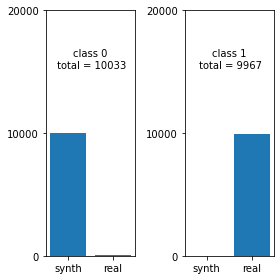

In [8]:
figure = plot_dist(classes, 10000, labels)

In [9]:
figure.savefig('./analysis_het_refine3d.png')